In [1]:
import pandas as pd
import numpy as np
from random import *
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("./data/airline.csv",header=0,encoding="utf8",error_bad_lines=False)
df.head()

C:\Users\Woojin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,airline_name,title,author,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,air_new_zealand,Air New Zealand customer review,David Dale,2019-12-22,Auckland to Christchurch return on A320. Fligh...,A320,Solo Leisure,Economy,Auckland to Christchurch,5.0,4.0,5.0,4.0,NaN,4.0,NaN,5.0,1
1,china_southern_airlines,China Southern Airlines customer review,Brent Evans,2019-12-22,My wife and I cannot speak highly enough about...,A330-200 / Boeing 787,Couple Leisure,First Class,Auckland to London via Guangzhou,5.0,5.0,5.0,5.0,4.0,4.0,NaN,5.0,1
2,emirates,Emirates customer review,B Finn,2019-12-22,Overall we found the experience disappointing....,A380,FamilyLeisure,Economy,Singapore to Paris via Dubai,3.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0,0
3,garuda_indonesia,Garuda Indonesia customer review,Michael Brien,2019-12-22,Melbourne to Denpasar return in late July / ea...,A330-300,FamilyLeisure,Economy,Melbourne to Denpasar,5.0,5.0,4.0,4.0,4.0,4.0,NaN,4.0,1
4,jetstar_airways,Jetstar Airways customer review,C Brennan,2019-12-22,Jetstar insist frequently enough during the on...,NaN,FamilyLeisure,Economy,Melbourne to Sydney,2.0,2.0,2.0,1.0,NaN,1.0,NaN,1.0,0


In [29]:
# The target variable is 'quality'.
Y = df['recommended']
X = df[['seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'inflight_entertainment_rating', 'ground_service_rating', 'value_money_rating']]

In [30]:
# Split the data into train and test data
# Stratify : stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [31]:
X_train.head()

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,value_money_rating
26930,5.0,5.0,4.0,3.0,NaN,4.0
5605,4.0,5.0,5.0,1.0,NaN,5.0
18019,5.0,5.0,5.0,5.0,NaN,5.0
12518,2.0,2.0,2.0,1.0,NaN,2.0
24877,1.0,2.0,NaN,NaN,NaN,2.0


In [32]:
# Filling Null Values
X_train = X_train.fillna(method='ffill').fillna(method='bfill')
X_test = X_test.fillna(method='ffill').fillna(method='bfill')

In [33]:
# 결측치 잘 채워졌는지 확인
X_train.isnull().sum()
X_test.isnull().sum()

seat_comfort_rating              0
cabin_staff_rating               0
food_beverages_rating            0
inflight_entertainment_rating    0
ground_service_rating            0
value_money_rating               0
dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(
         n_estimators=400,
         # better generality with 5
#          min_samples_leaf=5, 
         n_jobs=-1,
         oob_score=True)

rf.fit(X_train, Y_train)

# Make predictions for the test set
Y_pred = rf.predict(X_test)

print('The accuracy of the Random Forests model is :\t', metrics.accuracy_score(Y_test, Y_pred))
# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

The accuracy of the Random Forests model is :	 0.9196189342066091
Accuracy on training set: 0.951
Accuracy on test set: 0.920


In [38]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3071
           1       0.93      0.93      0.93      3647

    accuracy                           0.92      6718
   macro avg       0.92      0.92      0.92      6718
weighted avg       0.92      0.92      0.92      6718



In [39]:
CM = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred), columns = ['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
CM

,Predicted 0,Predicted 1
Actual 0,2802,269
Actual 1,271,3376


In [41]:
# SHAP

import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test, approximate=False, check_additivity=True)

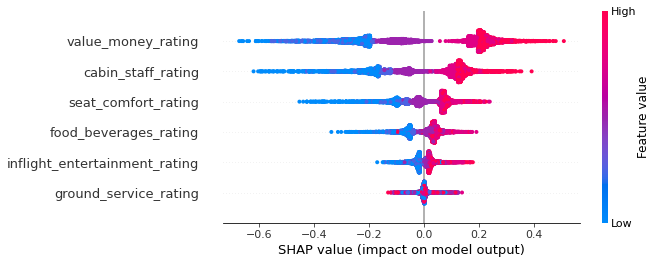

In [42]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)

In [73]:
# Calculate exact shap value of each service feature
mean_shap_feature_values_for_recommend = pd.DataFrame(shap_values[0], columns=X.columns).abs().mean(axis=0).sort_values(ascending=False)
mean_shap_feature_values_for_recommend

value_money_rating               0.221263
cabin_staff_rating               0.149348
seat_comfort_rating              0.078341
food_beverages_rating            0.050210
inflight_entertainment_rating    0.026814
ground_service_rating            0.011374
dtype: float64

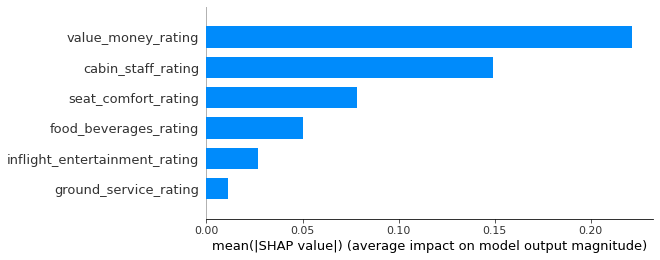

In [78]:
shap.summary_plot(shap_values[0], X_test, plot_type='bar')

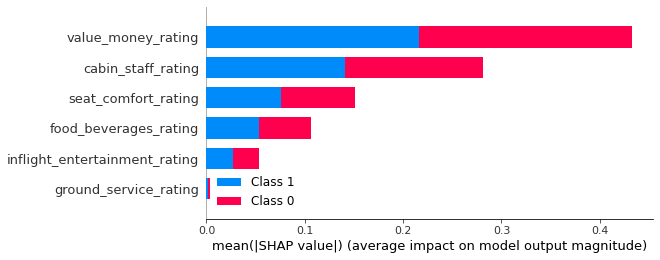

In [23]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
W = pd.read_csv('./lime_name_changed.csv', encoding='utf8')

In [9]:
#Plotting the aggregate importances
np.abs(W.drop("prediction", axis=1)).mean(axis=0).sort_values(ascending=False).head(20).sort_values(ascending=True).iplot(kind="barh")

In [6]:
#Aggregate importances split by classes
grped_coeff = W.groupby("prediction").mean()
 
grped_coeff = grped_coeff.T
grped_coeff["abs"] = np.abs(grped_coeff.iloc[:, 0])
grped_coeff.sort_values("abs", inplace=True, ascending=False)
grped_coeff.head(20).sort_values("abs", ascending=True).drop("abs", axis=1).iplot(kind="barh", bargap=0.5) 